# Accessing Azure MySQL Database (mysql.connector)

This example shows the code for accessing a MySQL database on Azure. The host, user, and password used here are temporary.
If this MySQL database is taken down then you need to set up your own:

1. Download ```lahman-mysql-dump.sql``` "2019 – MySQL version " (http://www.seanlahman.com/baseball-archive/statistics)
2. Replace the string ```utf8mb4_0900_ai_ci``` and replaced it with ```utf8mb4_general_ci``` in ```lahman-mysql-dump.sql```
3. Create an Azure Database for MySQL database on your Azure account using appropriate firewall settings for IPs.
4. In MySQL Workbench, connect to your MySql server.
5. In MySQL Workbench -> Server > Data Import > Import from Self-Contained File
6. Select the ```lahman-mysql-dump.sql``` file -> Click Start Import button.
7. Test it out in MySQL Workbench:
    ```
    USE `lahmansbaseballdb`;
    SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
    FROM batting b
        JOIN people p ON p.playerID = b.playerID
        JOIN teams t ON t.ID = b.team_ID
    WHERE b.YearID = 1977
    ORDER BY b.HR DESC
    LIMIT 5;
    ```

![Test MySQL Workbench](img/TestMySQLWorkbench.png)

## Access the Database Using ```mysql-connector-python```

* You need to run ```conda install -c anaconda mysql-connector-python```
* NOTE: The SSL version on the Python client side and the MySQL server side need to match. To avoid this SSL error, in this example, in the call to ```mysql.connect()```, we have ```ssl_disabled=True```, which is not usually suitable for production code. This is done here for simplicity of demonstration only. In production code, SLL should not be disabled like this, but instead, it should be solved by configuring the server and/or client to use the same version of SSL.

In [1]:
import platform
import sys
import ssl

print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))

os:            Windows-10-10.0.18362-SP0
python         3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
openssl:       OpenSSL 1.1.1d  10 Sep 2019
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2


In [2]:
# conda install -c anaconda mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="mysqllahmansbaseball.mysql.database.azure.com", # this server will not remain available in the long term
    user="newuser@mysqllahmansbaseball",                  # this user name will not remain available in the long term
    password="Pa$$w0rd",                                  # this password will not remain available in the long term
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)

In [3]:
cursor = cnx.cursor()
sql = "SELECT * FROM Batting LIMIT 10"
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

(1, 'abercda01', 1871, 1, 'TRO', 8, 'NA', 1, None, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, 0)
(2, 'addybo01', 1871, 1, 'RC1', 7, 'NA', 25, None, 118, 30, 32, 6, 0, 0, 13, 8, 1, 4, 0, None, None, None, None, 0)
(3, 'allisar01', 1871, 1, 'CL1', 3, 'NA', 29, None, 137, 28, 40, 4, 5, 0, 19, 3, 1, 2, 5, None, None, None, None, 1)
(4, 'allisdo01', 1871, 1, 'WS3', 9, 'NA', 27, None, 133, 28, 44, 10, 2, 2, 27, 1, 1, 0, 2, None, None, None, None, 0)
(5, 'ansonca01', 1871, 1, 'RC1', 7, 'NA', 25, None, 120, 29, 39, 11, 3, 0, 16, 6, 2, 2, 1, None, None, None, None, 0)
(6, 'armstbo01', 1871, 1, 'FW1', 4, 'NA', 12, None, 49, 9, 11, 2, 1, 0, 5, 0, 1, 0, 1, None, None, None, None, 0)
(7, 'barkeal01', 1871, 1, 'RC1', 7, 'NA', 1, None, 4, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, None, None, None, None, 0)
(8, 'barnero01', 1871, 1, 'BS1', 1, 'NA', 31, None, 157, 66, 63, 10, 9, 0, 34, 11, 6, 13, 1, None, None, None, None, 1)
(9, 'barrebi01', 1871, 1, 'FW1', 4, 'NA', 1, None, 5, 1, 1, 1, 0, 0, 1, 0, 

In [4]:
sql = """
SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
FROM batting b
    JOIN people p ON p.playerID = b.playerID
    JOIN teams t ON t.ID = b.team_ID
WHERE b.YearID = 1977
ORDER BY b.HR DESC
LIMIT 5;
"""
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

('George', 'Foster', 52, 'Cincinnati Reds', 1977)
('Jeff', 'Burroughs', 41, 'Atlanta Braves', 1977)
('Greg', 'Luzinski', 39, 'Philadelphia Phillies', 1977)
('Jim', 'Rice', 39, 'Boston Red Sox', 1977)
('Mike', 'Schmidt', 38, 'Philadelphia Phillies', 1977)


In [5]:
import pandas as pd

df = pd.DataFrame(results)
print(df)  

        0          1   2                      3     4
0  George     Foster  52        Cincinnati Reds  1977
1    Jeff  Burroughs  41         Atlanta Braves  1977
2    Greg   Luzinski  39  Philadelphia Phillies  1977
3     Jim       Rice  39         Boston Red Sox  1977
4    Mike    Schmidt  38  Philadelphia Phillies  1977


In [6]:
print(type(cursor.description))
print(type(cursor.description[0]))
print(cursor.description)

<class 'list'>
<class 'tuple'>
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('HR', 2, None, None, None, None, 1, 0), ('team', 253, None, None, None, None, 1, 0), ('yearID', 2, None, None, None, None, 0, 20481)]


In [7]:
from mysql.connector import FieldType

for i in range(len(cursor.description)):
  print("Column {}:".format(i+1))
  desc = cursor.description[i]
  print("  column_name = {}".format(desc[0]))
  print("  type = {} ({})".format(desc[1], FieldType.get_info(desc[1])))
  print("  null_ok = {}".format(desc[6]))
  print("  column_flags = {}".format(desc[7]))

Column 1:
  column_name = nameFirst
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 2:
  column_name = nameLast
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 3:
  column_name = HR
  type = 2 (SHORT)
  null_ok = 1
  column_flags = 0
Column 4:
  column_name = team
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 5:
  column_name = yearID
  type = 2 (SHORT)
  null_ok = 0
  column_flags = 20481


In [8]:
headers = [i[0] for i in cursor.description]
print(headers)

['nameFirst', 'nameLast', 'HR', 'team', 'yearID']


In [9]:
player = list(df[1] + " " + df[0])
print(player)

['Foster George', 'Burroughs Jeff', 'Luzinski Greg', 'Rice Jim', 'Schmidt Mike']


In [10]:
df = pd.DataFrame(results, columns =[headers[0], headers[1], headers[2], headers[3], headers[4]], index=player)
print(df)  

               nameFirst   nameLast  HR                   team  yearID
Foster George     George     Foster  52        Cincinnati Reds    1977
Burroughs Jeff      Jeff  Burroughs  41         Atlanta Braves    1977
Luzinski Greg       Greg   Luzinski  39  Philadelphia Phillies    1977
Rice Jim             Jim       Rice  39         Boston Red Sox    1977
Schmidt Mike        Mike    Schmidt  38  Philadelphia Phillies    1977


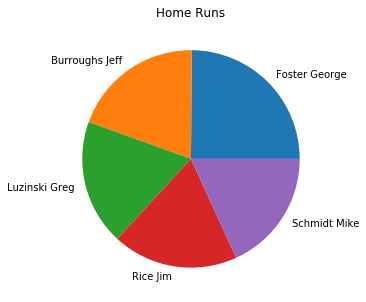

In [11]:
%matplotlib inline

df.plot(y="HR", kind='pie', title='Home Runs', legend=False, label="", figsize=(5, 5))